# Example with high-resolution CMIP6 models (~100 km) using Pangeo catalog 

### Time period

We will use data from 1985 to 2014.

### Variables 

| shortname     |             Long name                   |      Units    |  levels |
| ------------- |:---------------------------------------:| -------------:|--------:|
|  prsn         |    Snowfall Flux                        | [kg m-2 s-1]  | surface |
| clw           |    Mass Fraction of Cloud Liquid Water  |  [kg kg-1]    |    ml   |
| cli           |    Mass Fraction of Cloud Ice           | [kg kg-1]     |    ml   |
| tas           |    Near-Surface Air Temperature         |   [K]         | surface |
| ta            |    Air Temperature                      |  [K]          |    ml   |
| clivi         |    Ice Water Path                       | [kg m-2]      |         |
| lwp           |    Liquid Water Path                    | [kg m-2]      |         |
| pr            |    Precipitation                        | [kg m-2 s-1]  | surface |


## Import python packages

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore') # don't output warnings

# import packages
import sys
sys.path.append('/uio/kant/geo-metos-u1/franzihe/Documents/Python/globalsnow/eosc-nordic-climate-demonstrator/work/utils')
from imports import (xr, intake, cftime,  xe, glob, np, cm, pd, fct,ccrs, cy, plt)

xr.set_options(display_style="html")

# %matplotlib inline


# reload imports
%load_ext autoreload
%autoreload 2

### Open CMIP6 online catalog

In [2]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,709
grid_label,10
zstore,523113
dcpp_init_year,60


### Search corresponding data

In [3]:
list_models = [
    'NorESM2-MM',
    'TaiESM1',
    'EC-Earth3-AerChem',
    'GFDL-ESM4',
    'SAM0-UNICON',
    'CAMS-CSM1-0',
    'CMCC-CM2-HR4',
    'MPI-ESM1-2-HR',
    'BCC-CSM2-MR',
    'E3SM-1-1',
    'CMCC-CM2-SR5',
    'CMCC-ESM2',
    'FGOALS-f3-L',
    'E3SM-1-1-ECA',
    'CIESM',
    'GFDL-CM4',
    'MRI-ESM2-0']  

In [4]:
variable_id=[
            #  'prsn', 
            #  'clivi',
            # 'lwp',
            # 'tas',
            # 'pr',
            'clw'

             ]
cat = col.search(source_id=list_models, table_id = ['Amon', 'AERmon'], experiment_id=['historical'], variable_id=variable_id[0], member_id=['r1i1p1f1'])
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Amon,clw,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
1,CMIP,BCC,BCC-CSM2-MR,historical,r1i1p1f1,Amon,clw,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-CSM2-MR/historic...,NaN,20181126
2,CMIP,MRI,MRI-ESM2-0,historical,r1i1p1f1,Amon,clw,gn,gs://cmip6/CMIP6/CMIP/MRI/MRI-ESM2-0/historica...,NaN,20190308
3,CMIP,SNU,SAM0-UNICON,historical,r1i1p1f1,Amon,clw,gn,gs://cmip6/CMIP6/CMIP/SNU/SAM0-UNICON/historic...,NaN,20190323
4,CMIP,CAMS,CAMS-CSM1-0,historical,r1i1p1f1,Amon,clw,gn,gs://cmip6/CMIP6/CMIP/CAMS/CAMS-CSM1-0/histori...,NaN,20190708
5,CMIP,MPI-M,MPI-ESM1-2-HR,historical,r1i1p1f1,Amon,clw,gn,gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/hist...,NaN,20190710
6,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Amon,clw,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20190726
7,CMIP,CAS,FGOALS-f3-L,historical,r1i1p1f1,Amon,clw,gr,gs://cmip6/CMIP6/CMIP/CAS/FGOALS-f3-L/historic...,NaN,20190927
8,CMIP,NCC,NorESM2-MM,historical,r1i1p1f1,Amon,clw,gn,gs://cmip6/CMIP6/CMIP/NCC/NorESM2-MM/historica...,NaN,20191108
9,CMIP,E3SM-Project,E3SM-1-1,historical,r1i1p1f1,Amon,clw,gr,gs://cmip6/CMIP6/CMIP/E3SM-Project/E3SM-1-1/hi...,NaN,20191211


In [5]:
cat.df['source_id'].unique()

array(['GFDL-CM4', 'BCC-CSM2-MR', 'MRI-ESM2-0', 'SAM0-UNICON',
       'CAMS-CSM1-0', 'MPI-ESM1-2-HR', 'GFDL-ESM4', 'FGOALS-f3-L',
       'NorESM2-MM', 'E3SM-1-1', 'CIESM', 'CMCC-CM2-SR5', 'TaiESM1',
       'E3SM-1-1-ECA', 'EC-Earth3-AerChem', 'CMCC-CM2-HR4', 'CMCC-ESM2'],
      dtype=object)

### Create dictionary from the list of datasets we found

- This step may take several minutes so be patient!

In [6]:
# pass rename_cmip6 to consistently label coordinates
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True,}, )#preprocess=rename_cmip6)#'use_cftime':True})'decode_times':False


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [7]:
list(dset_dict.keys())

['CMIP.THU.CIESM.historical.Amon.gr',
 'CMIP.CMCC.CMCC-ESM2.historical.Amon.gn',
 'CMIP.NCC.NorESM2-MM.historical.Amon.gn',
 'CMIP.MRI.MRI-ESM2-0.historical.Amon.gn',
 'CMIP.SNU.SAM0-UNICON.historical.Amon.gn',
 'CMIP.MPI-M.MPI-ESM1-2-HR.historical.Amon.gn',
 'CMIP.CAS.FGOALS-f3-L.historical.Amon.gr',
 'CMIP.NOAA-GFDL.GFDL-ESM4.historical.Amon.gr1',
 'CMIP.CMCC.CMCC-CM2-HR4.historical.Amon.gn',
 'CMIP.AS-RCEC.TaiESM1.historical.Amon.gn',
 'CMIP.CAMS.CAMS-CSM1-0.historical.Amon.gn',
 'CMIP.E3SM-Project.E3SM-1-1-ECA.historical.Amon.gr',
 'CMIP.EC-Earth-Consortium.EC-Earth3-AerChem.historical.Amon.gr',
 'CMIP.CMCC.CMCC-CM2-SR5.historical.Amon.gn',
 'CMIP.BCC.BCC-CSM2-MR.historical.Amon.gn',
 'CMIP.E3SM-Project.E3SM-1-1.historical.Amon.gr',
 'CMIP.NOAA-GFDL.GFDL-CM4.historical.Amon.gr1']

In [8]:
# show coordinates
for k, ds in dset_dict.items():
    print(k)
    print(list(ds.dims))

CMIP.THU.CIESM.historical.Amon.gr
['lev', 'bnds', 'member_id', 'time', 'lat', 'lon']
CMIP.CMCC.CMCC-ESM2.historical.Amon.gn
['lev', 'bnds', 'member_id', 'time', 'lat', 'lon']
CMIP.NCC.NorESM2-MM.historical.Amon.gn
['lev', 'bnds', 'member_id', 'time', 'lat', 'lon']
CMIP.MRI.MRI-ESM2-0.historical.Amon.gn
['lev', 'bnds', 'member_id', 'time', 'lat', 'lon']
CMIP.SNU.SAM0-UNICON.historical.Amon.gn
['lev', 'bnds', 'member_id', 'time', 'lat', 'lon']
CMIP.MPI-M.MPI-ESM1-2-HR.historical.Amon.gn
['lev', 'bnds', 'member_id', 'time', 'lat', 'lon']
CMIP.CAS.FGOALS-f3-L.historical.Amon.gr
['lev', 'bnds', 'member_id', 'time', 'lat', 'lon']
CMIP.NOAA-GFDL.GFDL-ESM4.historical.Amon.gr1
['lev', 'bnds', 'member_id', 'time', 'lat', 'lon']
CMIP.CMCC.CMCC-CM2-HR4.historical.Amon.gn
['lev', 'bnds', 'member_id', 'time', 'lat', 'lon']
CMIP.AS-RCEC.TaiESM1.historical.Amon.gn
['lev', 'bnds', 'member_id', 'time', 'lat', 'lon']
CMIP.CAMS.CAMS-CSM1-0.historical.Amon.gn
['lev', 'bnds', 'member_id', 'time', 'lat', 'lo

Double check the time axis. Are they having the same calendar?

In [9]:
# metadata of the historical run:
_d2 = pd.Series(["calendar",
                 "branch_time_in_parent", #"parent_activity_id", "parent_experiment_id",	"parent_mip_era",
                 "parent_source_id",#"parent_sub_experiment_id", 
                 "parent_time_units",# "parent_variant_label"
                  ])
for i in dset_dict.keys():
    _data = []
    _names =[]
    _data.append(dset_dict[i].time.to_index().calendar)
    for k, v in dset_dict[i].attrs.items():
        
        if 'parent_time_units' in k or 'branch_time_in_parent' in k or 'parent_source_id' in k:
            _data.append(v)
            _names.append(k)
    _d2 = pd.concat([_d2,   pd.Series(_data)], axis=1)
    _d2.rename(columns={1:i.split('.')[2]}, inplace=True)
    _d2.rename(columns={0:i.split('.')[2]}, inplace=True)

_d2.dropna(how='all', axis=1, inplace=True)
_d2

,CIESM,CIESM,CMCC-ESM2,NorESM2-MM,MRI-ESM2-0,SAM0-UNICON,MPI-ESM1-2-HR,FGOALS-f3-L,GFDL-ESM4,CMCC-CM2-HR4,TaiESM1,CAMS-CSM1-0,E3SM-1-1-ECA,EC-Earth3-AerChem,CMCC-CM2-SR5,BCC-CSM2-MR,E3SM-1-1,GFDL-CM4
0,calendar,noleap,noleap,noleap,proleptic_gregorian,noleap,proleptic_gregorian,noleap,noleap,noleap,noleap,noleap,noleap,proleptic_gregorian,noleap,noleap,noleap,noleap
1,branch_time_in_parent,182500.0,0.0,438000.0,0.0,99645.0,0.0,12345.0,36500.0,0.0,171550.0,3025.0,0.0,0.0,0.0,2289.0,0.0,36500.0
2,parent_source_id,CIESM,CMCC-ESM2,NorESM2-MM,MRI-ESM2-0,SAM0-UNICON,MPI-ESM1-2-HR,FGOALS-f3-L,GFDL-ESM4,CMCC-CM2-HR4,TaiESM1,CAMS-CSM1-0,E3SM-1-1-ECA,EC-Earth3-AerChem,CMCC-CM2-SR5,BCC-CSM2-MR,E3SM-1-1,GFDL-CM4
3,parent_time_units,days since 0001-01-01,days since 1850-01-01,days since 0001-01-01,days since 1850-01-01,days since 0001-01-01,days since 1850-1-1 00:00:00,days since 0001-01-01,days since 0001-1-1,days since 1850-01-01,days since 1850-01-01,days since 1850-01-01,days since 0001-01-01,days since 1850-01-01,days since 1850-01-01,days since 1850-01-01,days since 0001-01-01,days since 0001-1-1


### Use data as xarray to make a simple plot

In [10]:
if variable_id[0] == 'lwp':
    ds = dset_dict['CMIP.NCC.NorESM2-MM.historical.AERmon.gn']
else:
    ds = dset_dict['CMIP.NCC.NorESM2-MM.historical.Amon.gn']
ds

<xarray.Dataset>
Dimensions:    (lev: 32, bnds: 2, member_id: 1, time: 1980, lat: 192, lon: 288)
Coordinates:
    a_bnds     (lev, bnds) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
    b_bnds     (lev, bnds) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lev        (lev) float64 0.9926 0.9763 0.9575 ... 0.01436 0.007595 0.003643
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * member_id  (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: bnds
Data variables:
    a          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    b          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    clw        (member_id, time, lev, lat, lon) float32 dask.array<chunksize=(1, 13, 32, 192, 288), meta=np.ndarray>
    p0         float64 ...
    ps         (time, lat, lon) float32 dask.array<chunksize=(13, 192, 288), meta=np.ndarray>
Attributes: (12/54)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 1200-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     438000.0
    ...                        ...
    variable_id:               clw
    variant_label:             r1i1p1f1
    netcdf_tracking_ids:       hdl:21.14100/1c8e58a1-c250-4120-9fb6-159885cd5...
    version_id:                v20191108
    intake_esm_varname:        ['clw']
    intake_esm_dataset_key:    CMIP.NCC.NorESM2-MM.historical.Amon.gn

In [11]:
ds[variable_id[0]].attrs

{'cell_measures': 'area: areacella',
 'cell_methods': 'area: time: mean',
 'comment': 'Includes both large-scale and convective cloud. Calculate as the mass of cloud liquid water in the grid cell divided by the mass of air (including the water in all phases) in the grid cells. Precipitating hydrometeors are included ONLY if the precipitating hydrometeors affect the calculation of radiative transfer in model.',
 'history': "2019-11-25T21:52:36Z altered by CMOR: Converted units from '1' to 'kg kg-1'. 2019-11-25T21:52:37Z altered by CMOR: Converted type from 'd' to 'f'. 2019-11-25T21:52:37Z altered by CMOR: Inverted axis: lev.",
 'long_name': 'Mass Fraction of Cloud Liquid Water',
 'original_name': 'CLDLIQ',
 'original_units': '1',
 'standard_name': 'mass_fraction_of_cloud_liquid_water_in_air',
 'units': 'kg kg-1'}

In [12]:
if ds.lev.all() == True:
   _month = ds.clw.isel(lev =16).groupby('time.month').mean('time', keep_attrs = True)
   
else:
    _month = ds[variable_id[0]].groupby('time.month').mean('time', keep_attrs = True)

_jan  = _month.sel(month = 1)

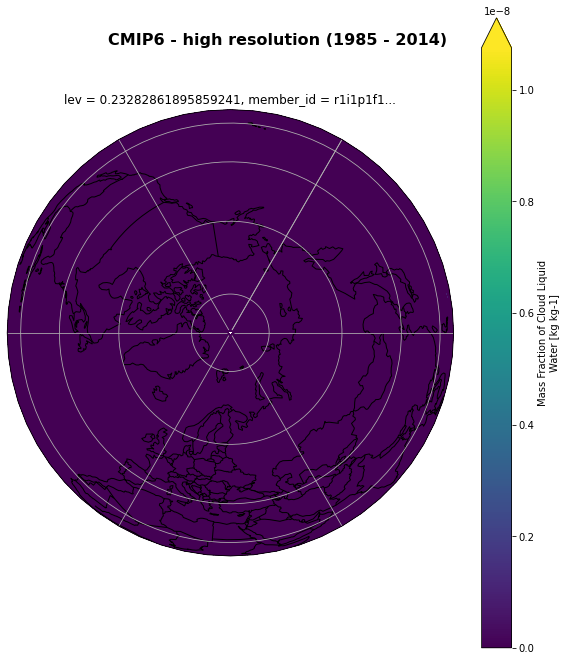

In [13]:
fig, ax = plt.subplots(1,1, 
                         figsize=[10,10], 
                         subplot_kw={'projection':ccrs.Orthographic(30, 90)})
fig.suptitle('CMIP6 - high resolution (1985 - 2014)', fontsize=16, fontweight="bold")

# Plot cosmetics 
ax.coastlines()
gl = ax.gridlines()
ax.add_feature(cy.feature.BORDERS);
gl.top_labels = False

im = _month.sel(month = 1).plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar = True,extend = 'max')



plt.tight_layout()
fig.subplots_adjust(top=1)

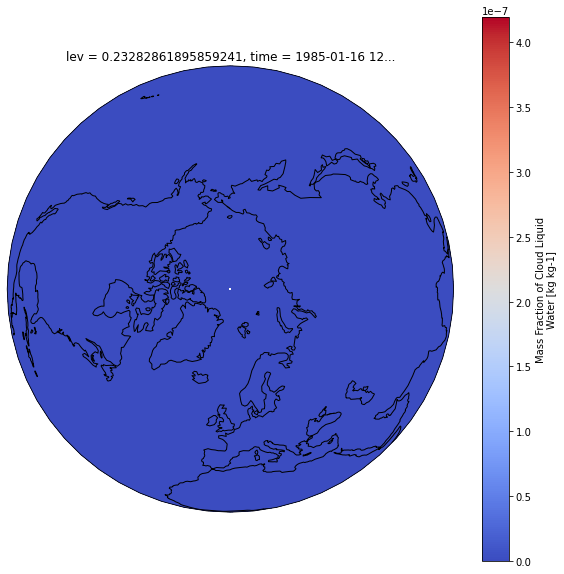

In [14]:
fig = plt.figure(1, figsize=[10,10])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()
if ds.lev.all() == True:
    ds[variable_id[0]].isel(lev=16).sel(time=cftime.DatetimeNoLeap(1985, 1, 16, 12, 0, 0, 0)).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
else:
    ds[variable_id[0]].sel(time=cftime.DatetimeNoLeap(1985, 1, 16, 12, 0, 0, 0)).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')

### Get attributes (unique identifier)

In [15]:
ds.attrs['tracking_id']

'hdl:21.14100/1c8e58a1-c250-4120-9fb6-159885cd5a96\nhdl:21.14100/c1340042-4644-4d38-9270-d000d8d14b19\nhdl:21.14100/c7f9967e-a7a9-44ae-bbb5-4b5a02c5a7b3\nhdl:21.14100/34449e11-fad2-4fea-82c8-19e194f8d7f5\nhdl:21.14100/fd79dd4c-b2aa-4290-83a2-07dce463a1c0\nhdl:21.14100/b548a684-f49f-4dac-b1a9-acc24a8ff750\nhdl:21.14100/66f04c76-793d-4a11-bed4-040d3b0b7de5\nhdl:21.14100/8e53004f-a51b-4fcb-b4db-cafd3cb33de3\nhdl:21.14100/c0b36dc0-7408-462a-a3da-849bda149260\nhdl:21.14100/5410d0a1-9def-42b7-91a0-d959a6650d4a\nhdl:21.14100/23e3e9fd-2131-4952-b5eb-36f058178ab2\nhdl:21.14100/e2948317-3a1d-4627-822c-03ed8097c2ed\nhdl:21.14100/be8f947a-bf1e-4a2f-9320-e33d65ef2b6c\nhdl:21.14100/8c2c2821-597e-45f9-8990-ba520145b33c\nhdl:21.14100/1c1b0353-cd70-47e6-8c17-676783f1a93b\nhdl:21.14100/214acf85-5eb2-4924-b063-adc28c657692\nhdl:21.14100/11406d14-0f70-44f6-ae0d-6c246f1305e3'

# Calculate pressure coordinates from sigma-pressure 

[Find support here](https://nordicesmhub.github.io/GEO4962/05-psyplot-simple_case/index.html)

First, Calculate the pressure levels with the equation:

$$ P(i,j,k) = A(k)P_0 + B(k)P_s(i,j)$$

GFDL-ESM4 is the only model which does not provide $P_s$ or $P_0$. A full documentation of GFDL-ESM4 is published in


 Dunne, J. P., Horowitz, L. W., Adcroft, A. J., Ginoux, P., Held, I. M., John, J. G., et al. (2020). The GFDL Earth System Model Version 4.1 (GFDL-ESM 4.1): Overall coupled model description and simulation characteristics. Journal of Advances in Modeling Earth Systems, 12, e2019MS002015. https://doi-org.ezproxy.uio.no/10.1029/2019MS002015 

 In [Zhao et al., 2018a](https://agupubs-onlinelibrary-wiley-com.ezproxy.uio.no/doi/full/10.1002/2017MS001208) the [supplementary 1 - Table 1](https://agupubs-onlinelibrary-wiley-com.ezproxy.uio.no/action/downloadSupplement?doi=10.1002%2F2017MS001208&file=jame20557-sup-0001-2017MS001208-s1.pdf) supports some information on the calculation of the pressure from sigma-pressure coordinates.

 For this purpose, in the next step the surface pressure is taken from the pangeo server. 

In [16]:
for keys in dset_dict.keys():
    
    
    if ('ps' in list(dset_dict[keys].keys())) == False:
        model = keys.split('.')[2]
        ds_ps = col.search(source_id=model, table_id = ['Amon', ], experiment_id=['historical'], variable_id=['ps','p0', ], member_id=['r1i1p1f1']).to_dataset_dict(zarr_kwargs={'use_cftime':True,}, )
        dset_dict[keys].update(ds_ps[keys], )
        
        
    # Rename datasets with different naming convention for constant A
    if ('a' in list(dset_dict[keys].keys())) == False:
            dset_dict[keys] = dset_dict[keys].rename({'ap':'a'}, )
            
            
    # Convert the model level from sigma to pressure
    #### a, b, ps, p0
    if ('a' in list(dset_dict[keys].keys())) == True and ('b' in list(dset_dict[keys].keys())) == True and ('p0' in list(dset_dict[keys].keys())) == True and ('ps' in list(dset_dict[keys].keys())) == True:
            dset_dict[keys]['pressure'] = dset_dict[keys]['a']*dset_dict[keys]['p0'] + dset_dict[keys]['b']*dset_dict[keys]['ps']
            dset_dict[keys]['pressure'].attrs = {'units': dset_dict[keys]['ps'].attrs['units'], 'long_name': 'Pressure', 'comment': 'calculated with p(i,j,k) = a*p0+b*ps','cell_methods': 'area: time: mean', 'cell_measures': 'area: areacella'}
            dset_dict[keys] = dset_dict[keys].drop(('a', 'p0', 'b', 'ps'))
    #### a, b, ps
    elif ('a' in list(dset_dict[keys].keys())) == True and ('b' in list(dset_dict[keys].keys())) == True and ('ps' in list(dset_dict[keys].keys())) == True and ('p0' in list(dset_dict[keys].keys())) == False:
            dset_dict[keys]['pressure'] = dset_dict[keys]['a'] + dset_dict[keys]['b']*dset_dict[keys]['ps']
            dset_dict[keys]['pressure'].attrs = {'units': dset_dict[keys]['ps'].attrs['units'], 'long_name': 'Pressure', 'comment': 'calculated with p(i,j,k) = a+b*ps','cell_methods': 'area: time: mean', 'cell_measures': 'area: areacella'}
            dset_dict[keys] = dset_dict[keys].drop(('a', 'b', 'ps'))



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


CMIP.NOAA-GFDL.GFDL-ESM4.historical.Amon.gr1


# Regrid CMIP6 data to common NorESM2-MM grid

In [17]:
starty = 1985; endy = 2014
year_range = range(starty, endy+1)

# create dictionary for reggridded data
ds_gridded_dict = dict()

# Read in the output grid from NorESM
if variable_id[0] == 'lwp':
    ds_out = dset_dict['CMIP.NCC.NorESM2-MM.historical.AERmon.gn'].isel(member_id = 0)
else:
    ds_out = dset_dict['CMIP.NCC.NorESM2-MM.historical.Amon.gn'].isel(member_id = 0)
ds_out = ds_out.sel(time = ds_out.time.dt.year.isin(year_range)).squeeze()

# if ds_out.lev.all == True:
#     ds_out = ds_out.transpose

counter = 0

for keys in dset_dict.keys():
    # select only models which have atmospheric monthly values
    amon = keys.split('.')[-2]
    if amon == 'Amon' or amon == 'AERmon': 
        # select model name 
        model = keys.split('.')[2]
        
        # select where data should be saved
        filename = '{}_Amon_1deg_{}01_{}12.nc'.format(variable_id[0], starty, endy)
        savepath = '/scratch/franzihe/output/CMIP6_hist/1deg/{}/'.format(model)
        nc_out = savepath + filename
        files = glob(nc_out)
        
        
            
        # Input data from CMIP6 model to be regridded
        ds_in = dset_dict[keys].isel(member_id = 0)
        ds_in = ds_in.sel(time = ds_in.time.dt.year.isin(year_range)).squeeze()
            
        # common time grid
        ds_in['time'] = ds_out['time']
            
            
            
        # Regrid data
        ds_in_regrid = fct.regrid_data(ds_in, ds_out)
          
        # Shift the longitude from 0-->360 to -180-->180 and sort by longitude and time
        ds_in_regrid = ds_in_regrid.assign_coords(lon=(((ds_in_regrid.lon + 180) % 360) - 180)).sortby('lon').sortby('time')
        ds_in_regrid = ds_in_regrid.reset_coords(names=['time_bnds', ], drop=True)
            

            
        # create dataset with all models
        ds_gridded_dict[model] = ds_in_regrid
        # ds_in_regrid.close(); ds_in.close(); ds_out.close()

        if nc_out in files:
        #     print('{} is downloaded'.format(nc_out))
        #     counter += 1
        #     print('Have regridded in total: {:} files'.format(str(counter)))
        # else:    
            # Save to netcdf file
            ds_in_regrid.to_netcdf(nc_out)
            print('file written: {}'.format(nc_out))

Create weight file: bilinear_192x288_192x288.nc
Remove file bilinear_192x288_192x288.nc
using dimensions ('lat', 'lon') from data variable clw as the horizontal dimensions for this dataset.
clw True
pressure True
file written: /scratch/franzihe/output/CMIP6_hist/1deg/CIESM/clw_Amon_1deg_198501_201412.nc
Create weight file: bilinear_192x288_192x288.nc
Remove file bilinear_192x288_192x288.nc
using dimensions ('lat', 'lon') from data variable clw as the horizontal dimensions for this dataset.
clw True
pressure True
file written: /scratch/franzihe/output/CMIP6_hist/1deg/CMCC-ESM2/clw_Amon_1deg_198501_201412.nc
Create weight file: bilinear_192x288_192x288.nc
Remove file bilinear_192x288_192x288.nc
using dimensions ('lat', 'lon') from data variable clw as the horizontal dimensions for this dataset.
clw True
pressure True
file written: /scratch/franzihe/output/CMIP6_hist/1deg/NorESM2-MM/clw_Amon_1deg_198501_201412.nc
Create weight file: bilinear_160x320_192x288.nc
Remove file bilinear_160x320

# Interpolate from CMIP6 model levels to ERA5 pressure levels
By using metpy.calc.log_interp, data with sigma as the vertical coordinate can be interpolated to isobaric coordinates. Along the example of [MetPy](https://unidata.github.io/MetPy/latest/examples/sigma_to_pressure_interpolation.html?highlight=sigma).

In [57]:
era_pressure = np.array([   1,    2,    3,    5,    7,   10,   20,   30,   50,   70,  100,  125,
        150,  175,  200,  225,  250,  300,  350,  400,  450,  500,  550,  600,
        650,  700,  750,  775,  800,  825,  850,  875,  900,  925,  950,  975,
       1000])

# era_pressure = np.flip(era_pressure)

In [105]:
from metpy.units import units
# from metpy.interpolate import log_interpolate_1d


In [106]:
data2 = dset_dict['CMIP.NCC.NorESM2-MM.historical.Amon.gn']


In [117]:
def log_interpolate_1d_V2(x, xp, *args, axis=0, fill_value=np.nan):
    r"""Interpolates data with logarithmic x-scale over a specified axis.
    Interpolation on a logarithmic x-scale for interpolation values in pressure coordinates.
    Parameters
    ----------
    x : array-like
        1-D array of desired interpolated values.
    xp : array-like
        The x-coordinates of the data points.
    args : array-like
        The data to be interpolated. Can be multiple arguments, all must be the same shape as
        xp.
    axis : int, optional
        The axis to interpolate over. Defaults to 0.
    fill_value: float, optional
        Specify handling of interpolation points out of data bounds. If None, will return
        ValueError if points are out of bounds. Defaults to nan.
    Returns
    -------
    array-like
        Interpolated values for each point with coordinates sorted in ascending order.
    Examples
    --------
     >>> x_log = np.array([1e3, 1e4, 1e5, 1e6])
     >>> y_log = np.log(x_log) * 2 + 3
     >>> x_interp = np.array([5e3, 5e4, 5e5])
     >>> metpy.interpolate.log_interpolate_1d(x_interp, x_log, y_log)
     array([20.03438638, 24.63955657, 29.24472675])
    Notes
    -----
    xp and args must be the same shape.
    """
    # # Handle units
    # x, xp = _strip_matching_units(x, xp)

    # Log x and xp
    log_x = np.log(x)
    log_xp = np.log(xp)
    return interpolate_1d(log_x, log_xp, *args, axis=axis, fill_value=fill_value)


def interpolate_1d(x, xp, *args, axis=0, fill_value=np.nan, return_list_always=False):
    r"""Interpolates data with any shape over a specified axis.
    Interpolation over a specified axis for arrays of any shape.
    Parameters
    ----------
    x : array-like
        1-D array of desired interpolated values.
    xp : array-like
        The x-coordinates of the data points.
    args : array-like
        The data to be interpolated. Can be multiple arguments, all must be the same shape as
        xp.
    axis : int, optional
        The axis to interpolate over. Defaults to 0.
    fill_value: float, optional
        Specify handling of interpolation points out of data bounds. If None, will return
        ValueError if points are out of bounds. Defaults to nan.
    return_list_always: bool, optional
        Whether to always return a list of interpolated arrays, even when only a single
        array is passed to `args`. Defaults to ``False``.
    Returns
    -------
    array-like
        Interpolated values for each point with coordinates sorted in ascending order.
    Examples
    --------
     >>> x = np.array([1., 2., 3., 4.])
     >>> y = np.array([1., 2., 3., 4.])
     >>> x_interp = np.array([2.5, 3.5])
     >>> metpy.interpolate.interpolate_1d(x_interp, x, y)
     array([2.5, 3.5])
    Notes
    -----
    xp and args must be the same shape.
    """
    # # Handle units
    # x, xp = _strip_matching_units(x, xp)

    # Make x an array
    x = np.asanyarray(x).reshape(-1)

    # Save number of dimensions in xp
    ndim = xp.ndim

    # Sort input data
    sort_args = np.argsort(xp, axis=axis)
    sort_x = np.argsort(x)

    # indices for sorting
    sorter = broadcast_indices(xp, sort_args, ndim, axis)

    # sort xp
    xp = xp[sorter]
    # Ensure pressure in increasing order
    variables = [arr[sorter] for arr in args]

    # Make x broadcast with xp
    x_array = x[sort_x]
    expand = [np.newaxis] * ndim
    expand[axis] = slice(None)
    x_array = x_array[tuple(expand)]

    # Calculate value above interpolated value
    minv = np.apply_along_axis(np.searchsorted, axis, xp, x[sort_x])
    minv2 = np.copy(minv)

    # If fill_value is none and data is out of bounds, raise value error
    if ((np.max(minv) == xp.shape[axis]) or (np.min(minv) == 0)) and fill_value is None:
        raise ValueError('Interpolation point out of data bounds encountered')

    # Warn if interpolated values are outside data bounds, will make these the values
    # at end of data range.
    if np.max(minv) == xp.shape[axis]:
        warnings.warn('Interpolation point out of data bounds encountered')
        minv2[minv == xp.shape[axis]] = xp.shape[axis] - 1
    if np.min(minv) == 0:
        minv2[minv == 0] = 1

    # Get indices for broadcasting arrays
    above = broadcast_indices(xp, minv2, ndim, axis)
    below = broadcast_indices(xp, minv2 - 1, ndim, axis)

    if np.any(x_array < xp[below]):
        warnings.warn('Interpolation point out of data bounds encountered')

    # Create empty output list
    ret = []

    # Calculate interpolation for each variable
    for var in variables:
        # Var needs to be on the *left* of the multiply to ensure that if it's a pint
        # Quantity, it gets to control the operation--at least until we make sure
        # masked arrays and pint play together better. See https://github.com/hgrecco/pint#633
        var_interp = var[below] + (var[above] - var[below]) * ((x_array - xp[below])
                                                               / (xp[above] - xp[below]))

        # Set points out of bounds to fill value.
        var_interp[minv == xp.shape[axis]] = fill_value
        var_interp[x_array < xp[below]] = fill_value

        # Check for input points in decreasing order and return output to match.
        if x[0] > x[-1]:
            var_interp = np.swapaxes(np.swapaxes(var_interp, 0, axis)[::-1], 0, axis)
        # Output to list
        ret.append(var_interp)

    if return_list_always or len(ret) > 1:
        return ret
    else:
        return ret[0]
    


def broadcast_indices(x, minv, ndim, axis):
    """Calculate index values to properly broadcast index array within data array.
    See usage in interp.
    """
    ret = []
    for dim in range(ndim):
        if dim == axis:
            ret.append(minv)
        else:
            broadcast_slice = [np.newaxis] * ndim
            broadcast_slice[dim] = slice(None)
            dim_inds = np.arange(x.shape[dim])
            ret.append(dim_inds[tuple(broadcast_slice)])
    return tuple(ret)


In [127]:
pressure = data2['pressure'].isel(time = 0, lat = 0, lon = 0).to_masked_array()
clw = data2['clw'].isel(time = 0, lat = 0, lon = 0, member_id = 0).to_masked_array() 

In [139]:
plevs = era_pressure*100

In [145]:
_clw, _pres = log_interpolate_1d_V2(plevs, pressure, clw, pressure, axis=0)

# Connect all models into one Dataset with new coordinate 'model'

In [ ]:
_ds = list(ds_gridded_dict.values())
_coord = list(ds_gridded_dict.keys())
ds_cmip = xr.concat(objs=_ds, dim=_coord, coords="all").rename({'concat_dim':'model'})
ds_cmip = ds_cmip.drop('bnds')



In [ ]:
if variable_id[0] == 'prsn':
    ds_cmip[variable_id[0]] = ds_cmip[variable_id[0]]*86400
    ds_cmip[variable_id[0]].attrs = {'units': 'mm day-1', 'long_name': 'Snowfall', 'comment': 'At surface; includes precipitation of all forms of water in the solid phase', 'cell_methods': 'area: time: mean', 'cell_measures': 'area: areacella'}
if variable_id[0]  == 'clivi':
    ds_cmip[variable_id[0]] = ds_cmip[variable_id[0]]*1000
    ds_cmip[variable_id[0]].attrs = {'units': 'g m-2', 'long_name': 'Ice Water Path', 'comment': 'mass of ice water in the column divided by the area of the column (not just the area of the cloudy portion of the column). Includes precipitating frozen hydrometeors ONLY if the precipitating hydrometeor affects the calculation of radiative transfer in model.', 'cell_methods': 'area: time: mean', 'cell_measures': 'area: areacella'}    
if variable_id[0] == 'lwp':
    ds_cmip[variable_id[0]] = ds_cmip[variable_id[0]]*1000
    ds_cmip[variable_id[0]].attrs = {'units': 'g m-2', 'long_name': 'Liquid Water Path', 'comment': 'The total mass of liquid water in cloud per unit area.', 'cell_methods': 'area: time: mean', 'cell_measures': 'area: areacella'}
if variable_id[0] == 'pr':
    ds_cmip[variable_id[0]] = ds_cmip[variable_id[0]]*86400
    ds_cmip[variable_id[0]].attrs = {'units': 'mm day-1', 'long_name': 'Precipitation', 'comment': 'includes both liquid and solid phases','cell_methods': 'area: time: mean', 'cell_measures': 'area: areacella'}

# Create seasonal mean of all regridded models
...and plot seasonal mean of each individual model

In [ ]:
ds_cmip[variable_id[0]+'_season_mean'] = ds_cmip[variable_id[0]].groupby('time.season').mean('time', keep_attrs=True)

In [ ]:
for model in ds_cmip.model.values:
    fct.plt_spatial_seasonal_mean(ds_cmip[variable_id[0]+'_season_mean'].sel(model=model), title='{} MEAN ({} - {})'.format(model,starty, endy))

# Create model mean/spread of seasonal mean of all regridded models

In [ ]:
ds_cmip[variable_id[0]+'_season_model_mean'] = ds_cmip[variable_id[0]+'_season_mean'].mean('model', keep_attrs=True, skipna = True)
ds_cmip[variable_id[0]+'_season_model_std']  = ds_cmip[variable_id[0]+'_season_mean'].std('model', keep_attrs=True, skipna = True)

In [ ]:
if variable_id[0] == 'prsn':
    label='Snowfall (mm$\,$day$^{-1}$)'
    vmin = 0
    vmax = 2.5
    levels = 25
    add_colorbar=False
    vmin_std = vmin
    vmax_std= 0.6
if variable_id[0] == 'pr':
    label='Total precipitation (mm$\,$day$^{-1}$)' 
    vmin = 0
    vmax=9
    levels = 90
    add_colorbar=False
    vmin_std =vmin
    vmax_std = 2.4
elif variable_id[0] == 'clivi':
    label='Ice Water Path (g$\,$m$^{-2}$)'
    vmin = 0
    vmax=100
    levels = 25
    add_colorbar = False
    vmin_std =vmin
    vmax_std = 20
elif variable_id[0] == 'lwp':
    label='Liquid Water Path (g$\,$m$^{-2}$)'
    vmin = 0
    vmax=100
    levels = 25
    add_colorbar = False
    vmin_std =vmin
    vmax_std = 20
elif variable_id[0] == 'tas':
    label='2-m temperature (K)'
    vmin = 246
    vmax=300
    levels = 40
    add_colorbar = False
    vmin_std = 0
    vmax_std=6
    

In [ ]:
fig, axs, im = fct.plt_spatial_seasonal_mean(ds_cmip[variable_id[0]+'_season_model_mean'], vmin, vmax, levels, add_colorbar=False, title='CMIP6 - high resolution (1985 - 2014)')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1, 0.15, 0.025, 0.7])
cb = fig.colorbar(im, cax=cbar_ax, orientation="vertical", fraction=0.046, pad=0.04)
cb.set_label(label='MEAN - {}'.format(label), weight='bold')

plt.tight_layout()


axs[2].text(1,-0.12, ds_cmip.model.values.tolist()[0:5], size=12, ha="center", 
         transform=axs[2].transAxes, bbox ={'facecolor':'green',
                'alpha':0.6,
                'pad':5})
if len(ds_cmip.model.values.tolist()) > 4:
    axs[2].text(1,-0.25, ds_cmip.model.values.tolist()[5:10], size=12, ha="center", 
            transform=axs[2].transAxes, bbox ={'facecolor':'green',
                    'alpha':0.6,
                    'pad':5})
if len(ds_cmip.model.values.tolist()) > 10:
    axs[2].text(1,-0.38, ds_cmip.model.values.tolist()[10:-1], size=12, ha="center", 
            transform=axs[2].transAxes, bbox ={'facecolor':'green',
                    'alpha':0.6,
                    'pad':5})
    

# save figure to png
figdir = '/uio/kant/geo-metos-u1/franzihe/Documents/Figures/CMIP6/'
figname = '{}_season_mean_1deg_{}_{}.png'.format(variable_id[0], starty, endy)
plt.savefig(figdir + figname, format = 'png', bbox_inches = 'tight', transparent = False)

In [ ]:
fig, axs, im = fct.plt_spatial_seasonal_mean(ds_cmip[variable_id[0]+'_season_model_mean'], vmin, vmax, levels, add_colorbar=False, title='CMIP6 - high resolution (1985 - 2014)')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1, 0.15, 0.025, 0.7])
cb = fig.colorbar(im, cax=cbar_ax, orientation="vertical", fraction=0.046, pad=0.04)
cb.set_label(label='MEAN - {}'.format(label), weight='bold')



for ax, i in zip(axs, ds_cmip[variable_id[0]+'_season_model_std'].season):
    sm = ds_cmip[variable_id[0]+'_season_model_std'].sel(season=i).plot.contour(ax=ax, transform=ccrs.PlateCarree(), 
                                                                      robust=True,
                                                                      vmin = vmin_std, vmax = vmax_std,
                                                                       levels = 6,
                                                                      cmap=cm.lajolla,
                                                                      add_colorbar=False)
    
cbar_ax = fig.add_axes([1.10, 0.15, 0.025, 0.7])
sb = fig.colorbar(sm, cax=cbar_ax, orientation="vertical", fraction=0.046, pad=0.04)
sb.set_label(label='STD - {}'.format(label), weight='bold')


plt.tight_layout()


axs[2].text(1,-0.12, ds_cmip.model.values.tolist()[0:5], size=12, ha="center", 
         transform=axs[2].transAxes, bbox ={'facecolor':'green',
                'alpha':0.6,
                'pad':5})
if len(ds_cmip.model.values.tolist()) > 4:
    axs[2].text(1,-0.25, ds_cmip.model.values.tolist()[5:10], size=12, ha="center", 
            transform=axs[2].transAxes, bbox ={'facecolor':'green',
                    'alpha':0.6,
                    'pad':5})
if len(ds_cmip.model.values.tolist()) > 10:
    axs[2].text(1,-0.38, ds_cmip.model.values.tolist()[10:-1], size=12, ha="center", 
            transform=axs[2].transAxes, bbox ={'facecolor':'green',
                    'alpha':0.6,
                    'pad':5})
# save figure to png
figdir = '/uio/kant/geo-metos-u1/franzihe/Documents/Figures/CMIP6/'
figname = '{}_season_mean_std_1deg_{}_{}.png'.format(variable_id[0], starty, endy)
plt.savefig(figdir + figname, format = 'png', bbox_inches = 'tight', transparent = False)

In [ ]:
# savet to netcdf
filename = '{}_1deg_{}01_{}12.nc'.format(variable_id[0], starty, endy)
savepath = '/scratch/franzihe/output/CMIP6_hist/1deg/'
nc_out = savepath + filename
files = glob(nc_out)

counter = 0 
# Save to netcdf file
if nc_out in files:
#     print('{} is downloaded'.format(nc_out))
#     counter += 1
#     print('Have saved in total: {:} files'.format(str(counter)))
# else:
    ds_cmip.to_netcdf(nc_out)
    print('file written: .{}'.format(nc_out))